In [1]:
import os
import cv2
import pickle
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC

# Training Data

In [2]:
DATADIR = "My_Dataset/Train"
CATEGORIES = [ f.name for f in os.scandir(DATADIR) if f.is_dir() ]

training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in os.listdir(path):  
            try:
                img_array = cv2.imread(os.path.join(path,img))  
                new_array = cv2.resize(img_array, (50, 50))  
                new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass

create_training_data()

In [3]:
print(len(training_data))

2736


In [4]:
import random

random.shuffle(training_data)

In [5]:
X_train = []
y_train = []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, 50, 50)

In [6]:
pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [7]:
pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

# Test Data

In [8]:
DATADIR = "My_Dataset/Test"
CATEGORIES = [ f.name for f in os.scandir(DATADIR) if f.is_dir() ]

testing_data = []

def create_testing_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in os.listdir(path):  
            try:
                img_array = cv2.imread(os.path.join(path,img))  
                new_array = cv2.resize(img_array, (50, 50))  
                new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                testing_data.append([new_array, class_num])  
            except Exception as e:  
                pass

create_testing_data()

In [9]:
print(len(testing_data))

304


In [10]:
import random

random.shuffle(testing_data)

In [11]:
X_test = []
y_test = []

for features,label in training_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, 50, 50)

In [12]:
pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

# Classification

In [30]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(2736, 2500)

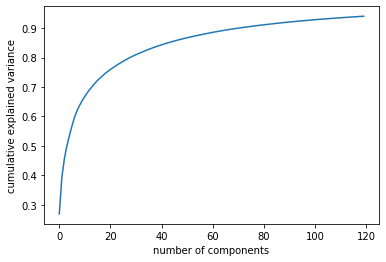

In [16]:
n_components = 120
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [17]:
eigenfaces = pca.components_.reshape((n_components, 50, 50))

In [18]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [19]:
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.001,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [20]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(X_test_pca)

Predicting the people names on the testing set


In [21]:
print(classification_report(y_test, y_pred, target_names=CATEGORIES))

              precision    recall  f1-score   support

     9326871       1.00      1.00      1.00        18
     9332898       1.00      1.00      1.00        18
     9336923       1.00      1.00      1.00        18
     9338446       1.00      1.00      1.00        18
     9338454       1.00      1.00      1.00        18
     9338462       1.00      1.00      1.00        18
     9338489       1.00      1.00      1.00        18
     9338497       1.00      1.00      1.00        18
     9338519       1.00      1.00      1.00        18
     9338527       1.00      1.00      1.00        18
     9338535       1.00      1.00      1.00        18
     9338543       1.00      1.00      1.00        18
     9414649       1.00      1.00      1.00        18
     9416994       1.00      1.00      1.00        18
      admars       1.00      1.00      1.00        18
      ahodki       1.00      1.00      1.00        18
      ajflem       1.00      1.00      1.00        18
      ajones       1.00    

In [22]:
print(confusion_matrix(y_test, y_pred, labels=range(len(CATEGORIES))))

[[18  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  0  0 18]]


In [23]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

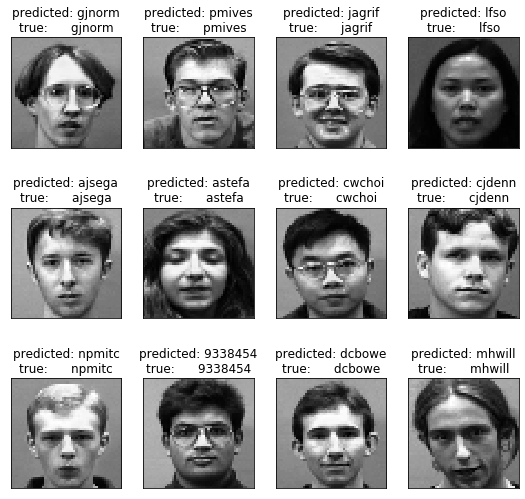

In [24]:
prediction_titles = [title(y_pred, y_test, CATEGORIES, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, 50, 50)

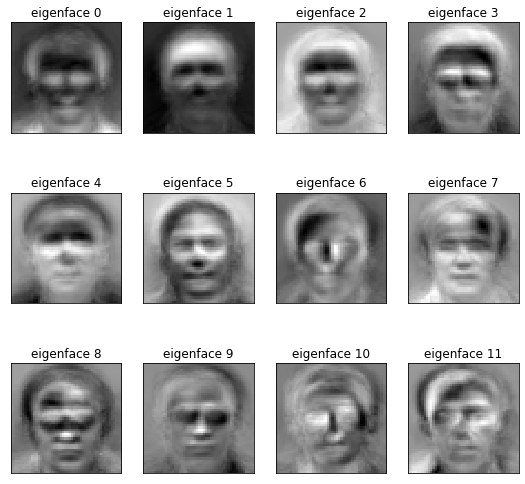

In [25]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, 50, 50)
plt.show()

In [26]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

1.0
